In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [59]:
df=pd.read_csv("data.csv")
df=df[df["natlangs"].notna()]

/Users/mazeppa/opt/anaconda3/envs/snowflakes/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
df["bilingual"]=(df["natlangs"].str.split(",").apply(lambda x :len(x))>1)*1

In [4]:
df.head()

,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,dyslexia,psychiatric,...,q34_6,q34_8,q35_1,q35_2,q35_4,q35_5,q35_7,q35_8,correct,elogit
0,1,2.0,2014-05-29,01:00:55,male,31,English,English,0,0,...,1,1,1,1,1,1,1,1,0.978947,3.621671
1,2,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1,1.000000,5.252273
2,3,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1,1.000000,5.252273
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,0,...,1,1,1,1,1,0,1,1,0.905263,2.208853
4,5,5.0,2014-05-29,01:01:19,male,20,"Chinese/Mandarin, English","Chinese/Mandarin, English",0,0,...,1,1,1,1,1,0,1,1,0.947368,2.800602


#### Simple statistics

In [183]:
df.columns[:35]

Index(['Unnamed: 0', 'id', 'date', 'time', 'gender', 'age', 'natlangs',
       'primelangs', 'dyslexia', 'psychiatric', 'education', 'tests',
       'Eng_start', 'Eng_country_yrs', 'house_Eng', 'dictionary',
       'already_participated', 'countries', 'currcountry', 'US_region',
       'UK_region', 'Can_region', 'Ebonics', 'Ir_region', 'UK_constituency',
       'nat_Eng', 'prime_Eng', 'speaker_cat', 'type', 'Lived_Eng_per',
       'Eng_little', 'q1', 'q2', 'q3', 'q5'],
      dtype='object')

In [5]:
print("number of total participants : ", len(df));

number of total participants :  669498


Text(0.5, 1.0, "['Age distribution of Participants']")

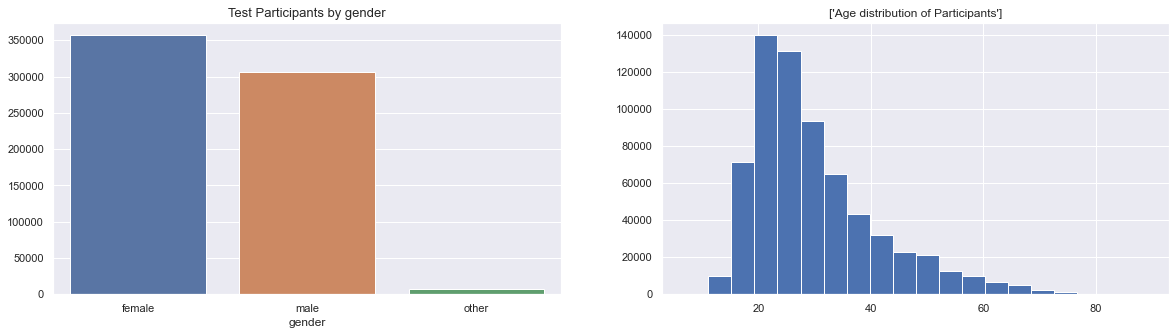

In [6]:
fig,axes=plt.subplots(1,2,figsize=(20,5))

sns.barplot(x=df.groupby("gender").size().index,y=df.groupby("gender").size().values,ax=axes[0]); 
axes[0].set_title("Test Participants by gender",fontsize=13);

axes[1].hist(df["age"],bins=20);
axes[1].set_title(["Age distribution of Participants"])

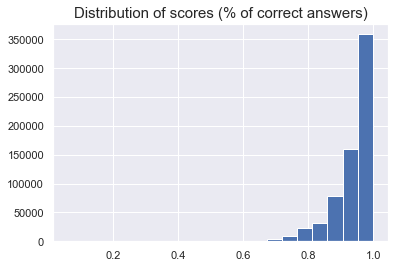

In [8]:
#plt.subplots(figsize=(8,6))
plt.hist(df["correct"],bins=20);
plt.title("Distribution of scores (% of correct answers)",fontsize=15);

#### Is there a difference between uniligual and bilingual and speaker english learning skills ?

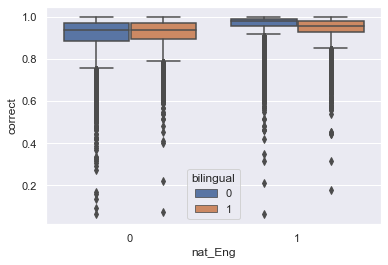

In [66]:
sns.boxplot(x="nat_Eng",y="correct",hue="bilingual",data=df);

In [71]:
nat_eng=df[df["nat_Eng"]==1]
nat_other=df[df["nat_Eng"]==0]

In [151]:
print ("bilingual native english speakers performance : ",  nat_eng[nat_eng["bilingual"]==1]["correct"].mean())
print ("unilingual native english speakers performance : ",  nat_eng[nat_eng["bilingual"]==0]["correct"].mean())

bilingual native english speakers performance :  0.9453559521400862
unilingual native english speakers performance :  0.9657427004080517


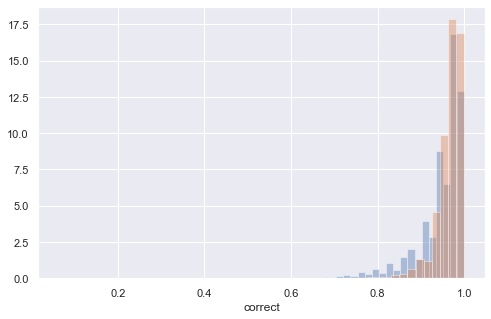

In [112]:
fig,ax=plt.subplots(figsize=(8,5))
plt.hist(nat_eng[nat_eng["bilingual"]==1]["correct"],kde=False,norm_hist=True);
sns.distplot(nat_eng[nat_eng["bilingual"]==0]["correct"],kde=False,norm_hist=True);

In [152]:
# scikit-learn bootstrap
from sklearn.utils import resample

x=nat_eng["correct"]
y=nat_eng[nat_eng["bilingual"]==1]["correct"]
z=nat_eng[nat_eng["bilingual"]==0]["correct"]

y_tilda=y-y.mean()+x.mean()
z_tilda=z-z.mean()+x.mean()

resamples=1000

# prepare bootstrap sample
boostrap_means_y=[resample(y_tilda, replace=True, n_samples=len(y)).mean() for i in range(1000)]
boostrap_means_z=[resample(z_tilda, replace=True, n_samples=len(y)).mean() for i in range(1000)]


print(np.sum(np.array(np.array(boostrap_means_y) - np.array(boostrap_means_z)) > np.array(np.abs(y.mean()-z.mean())))/resamples)

0.0


#### Are some countries better than others at learning languages ? 

In [171]:
nat_other_common=nat_other[nat_other["natlangs"].isin(nat_other.groupby("natlangs").size()[nat_other.groupby("natlangs").size()>500].index)]

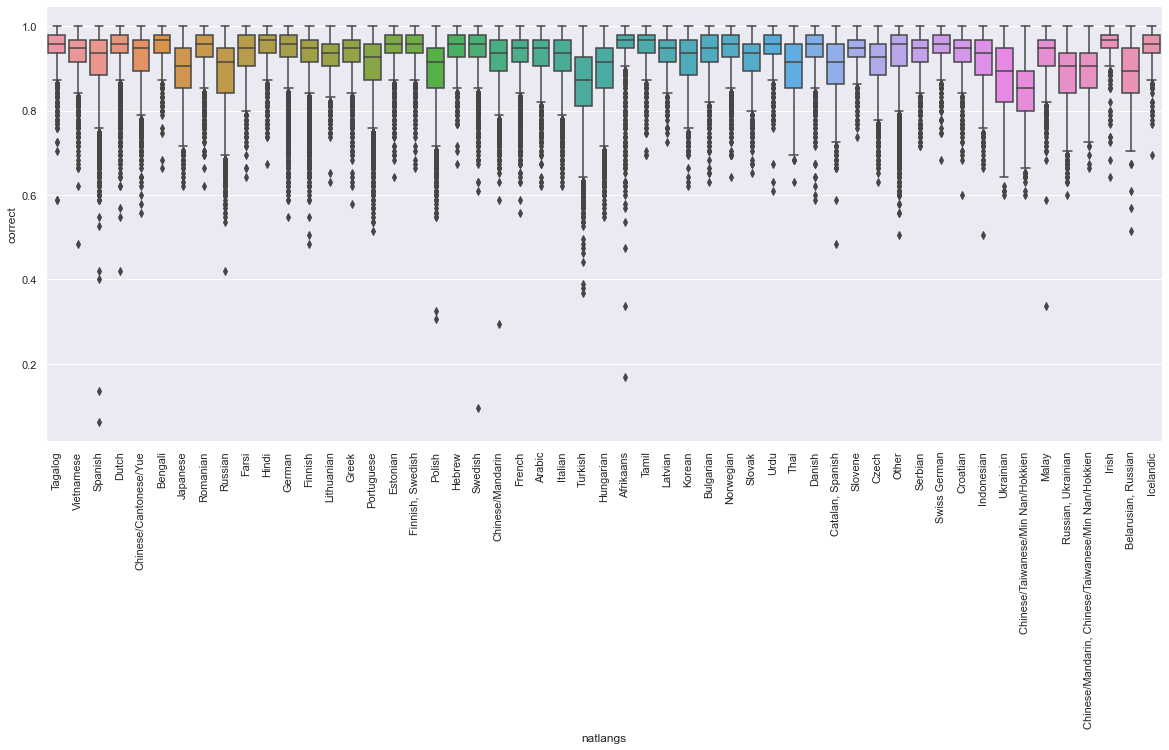

In [178]:
fig,ax=plt.subplots(figsize=(20,8));
sns.boxplot(y="correct",x="natlangs",data=nat_other_common,ax=ax);
plt.xticks(rotation=90);

#### Is there an ideal age to start learning english ?

In [180]:
df.columns

,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,dyslexia,psychiatric,...,q34_8,q35_1,q35_2,q35_4,q35_5,q35_7,q35_8,correct,elogit,bilingual
0,1,2.0,2014-05-29,01:00:55,male,31,English,English,0,0,...,1,1,1,1,1,1,1,0.978947,3.621671,0
1,2,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1.000000,5.252273,0
2,3,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1.000000,5.252273,0
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,0,...,1,1,1,1,0,1,1,0.905263,2.208853,0
4,5,5.0,2014-05-29,01:01:19,male,20,"Chinese/Mandarin, English","Chinese/Mandarin, English",0,0,...,1,1,1,1,0,1,1,0.947368,2.800602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669492,680336,3678498.0,2014-07-24,11:53:42,female,20,English,English,0,0,...,1,1,1,1,1,1,1,0.989474,4.143135,0
669493,680337,3678499.0,2014-07-24,11:53:57,female,22,Russian,Russian,0,0,...,1,1,1,1,1,1,0,0.831579,1.572397,0
669494,680338,3678500.0,2014-07-24,11:55:57,female,22,Polish,"English, Polish",0,0,...,1,1,1,1,1,1,1,0.968421,3.274446,0
669496,680340,3678503.0,2014-07-24,11:57:36,male,27,"Chinese/Mandarin, English, Japanese","Chinese/Mandarin, English",0,0,...,1,1,1,1,1,1,1,0.915789,2.331573,1


(0.5, 1.0)

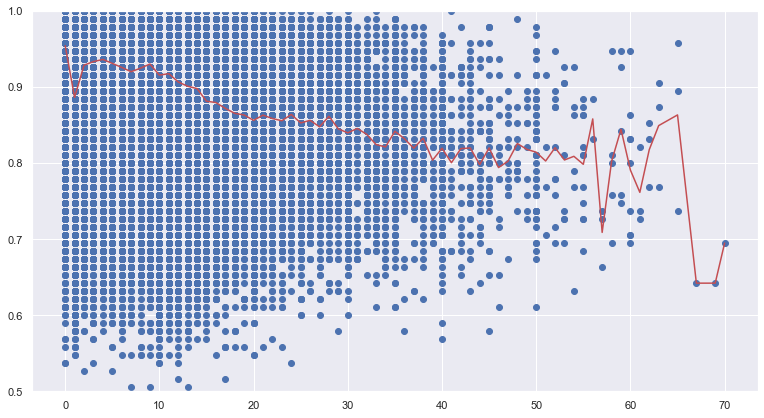

In [228]:
fig,ax=plt.subplots(figsize=(13,7))
ax.scatter(x="Eng_start",y="correct",data=nat_other_common);
ax.plot(nat_other_common.groupby("Eng_start")["correct"].mean().index,nat_other_common.groupby("Eng_start")["correct"].mean(),c="r");
ax.set_ylim(0.5,1);